# Avocado Project

### Project Description

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 
The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 
Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 
The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.
Some relevant columns in the dataset:

Inspiration /Label 
The dataset can be seen in two angles to find the region and find the average price .
- Task: One of Classification and other of Regression
- Do both tasks in the same .ipynb file and submit at single file. 

Dataset Link-
https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/avocado.csv.zip


In [1]:
## Importing the necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
## Importing Dataset
df = pd.read_csv('avocado.csv')
df.head()

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015  Albany  
4  2015  Albany

In [3]:
df.shape

(18249, 14)

- The Dataset seems to have 18249 rows and 14 columns
- The first column is Unamed and is not relevant to the Dataset so we will remove it
- Since we 2 Output features each for Regression and Classification problem we will first Do the Regression problem and then Classification
- The Output feature for Regression is Average Price 
- The Output feature for Classification is Region
- There are some Categorical features in the Dataset as well as Datetime feature

## Exploratory Data Analysis

In [4]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [5]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

- Date - The date of the observation
- AveragePrice - the average price of a single avocado
- type - conventional or organic
- year - the year
- Region - the city or region of the observation
- Total Volume - Total number of avocados sold
- 4046 - Total number of avocados with PLU 4046 sold
- 4225 - Total number of avocados with PLU 4225 sold
- 4770 - Total number of avocados with PLU 4770 sold

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


- here are 9 columns in our dataset with float values, 1 column with integer value and 3 columns with object data type

In [7]:
df.isna().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [8]:
df.duplicated().any()

False

In [9]:
df.isin(['NA','N/A','-',' ','?',' ?']).sum().any()

False

##### Observation
- There seems to be no NULL Values in the Dataset
- There are no Duplicate Values or white spaces in the Dataset and we can proceed to Visualisation

In [10]:
df.describe().T

count           mean           std      min       25%  \
AveragePrice  18249.0       1.405978  4.026766e-01     0.44      1.10   
Total Volume  18249.0  850644.013009  3.453545e+06    84.56  10838.58   
4046          18249.0  293008.424531  1.264989e+06     0.00    854.07   
4225          18249.0  295154.568356  1.204120e+06     0.00   3008.78   
4770          18249.0   22839.735993  1.074641e+05     0.00      0.00   
Total Bags    18249.0  239639.202060  9.862424e+05     0.00   5088.64   
Small Bags    18249.0  182194.686696  7.461785e+05     0.00   2849.42   
Large Bags    18249.0   54338.088145  2.439660e+05     0.00    127.47   
XLarge Bags   18249.0    3106.426507  1.769289e+04     0.00      0.00   
year          18249.0    2016.147899  9.399385e-01  2015.00   2015.00   

                    50%        75%          max  
AveragePrice       1.37       1.66         3.25  
Total Volume  107376.76  432962.29  62505646.52  
4046            8645.30  111020.20  22743616.17  
4225           29061.02  150206.86  20470572.61  
4770             184.99    6243.42   2546439.11  
Total Bags     39743.83  110783.37  19373134.37  
Small Bags     26362.82   83337.67  13384586.80  
Large Bags      2647.71   22029.25   5719096.61  
XLarge Bags        0.00     132.50    551693.65  
year            2016.00    2017.00      2018.00

- There have zero values present in columns 4046, 4225, 4770, Total Bags, Small Bags, Large Bags and XLarge Bags which may be valid since there is a possibility of presence of a Real zero value.

In [11]:
df.nunique()

Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

In [12]:
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
dtype: float64

- Almost all columns have Skewness which needs to be treated properly

Since we have a Date column we will seperate it into Day, month, year so we can convert it to Numerical Feature

In [13]:
df['Year'], df['Month'], df['Day'] = df['Date'].str.split('-').str
df.drop(columns=['Date','year'], inplace=True)

In [14]:
df

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0              1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1              1.35      54876.98   674.28   44638.81   58.33     9505.56   
2              0.93     118220.22   794.70  109149.67  130.50     8145.35   
3              1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4              1.28      51039.60   941.48   43838.39   75.78     6183.95   
...             ...           ...      ...        ...     ...         ...   
18244          1.63      17074.83  2046.96    1529.20    0.00    13498.67   
18245          1.71      13888.04  1191.70    3431.50    0.00     9264.84   
18246          1.87      13766.76  1191.92    2452.79  727.94     9394.11   
18247          1.93      16205.22  1527.63    2981.04  727.01    10969.54   
18248          1.62      17489.58  2894.77    2356.13  224.53    12014.15   

       Small Bags  Large Bags  XLarge Bags          type            region  \
0         8603.62       93.25          0.0  conventional            Albany   
1         9408.07       97.49          0.0  conventional            Albany   
2         8042.21      103.14          0.0  conventional            Albany   
3         5677.40      133.76          0.0  conventional            Albany   
4         5986.26      197.69          0.0  conventional            Albany   
...           ...         ...          ...           ...               ...   
18244    13066.82      431.85          0.0       organic  WestTexNewMexico   
18245     8940.04      324.80          0.0       organic  WestTexNewMexico   
18246     9351.80       42.31          0.0       organic  WestTexNewMexico   
18247    10919.54       50.00          0.0       organic  WestTexNewMexico   
18248    11988.14       26.01          0.0       organic  WestTexNewMexico   

       Year Month Day  
0      2015    12  27  
1      2015    12  20  
2      2015    12  13  
3      2015    12  06  
4      2015    11  29  
...     ...   ...  ..  
18244  2018    02  04  
18245  2018    01  28  
18246  2018    01  21  
18247  2018    01  14  
18248  2018    01  07  

[18249 rows x 14 columns]

In [15]:
## Convertin the Datatype to Integer instead of Object Datatype
df['Year']=df['Year'].astype(int)
df['Month']=df['Month'].astype(int)
df['Date']=df['Day'].astype(int)
df.drop(columns=['Day'], inplace=True)

In [16]:
df

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0              1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1              1.35      54876.98   674.28   44638.81   58.33     9505.56   
2              0.93     118220.22   794.70  109149.67  130.50     8145.35   
3              1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4              1.28      51039.60   941.48   43838.39   75.78     6183.95   
...             ...           ...      ...        ...     ...         ...   
18244          1.63      17074.83  2046.96    1529.20    0.00    13498.67   
18245          1.71      13888.04  1191.70    3431.50    0.00     9264.84   
18246          1.87      13766.76  1191.92    2452.79  727.94     9394.11   
18247          1.93      16205.22  1527.63    2981.04  727.01    10969.54   
18248          1.62      17489.58  2894.77    2356.13  224.53    12014.15   

       Small Bags  Large Bags  XLarge Bags          type            region  \
0         8603.62       93.25          0.0  conventional            Albany   
1         9408.07       97.49          0.0  conventional            Albany   
2         8042.21      103.14          0.0  conventional            Albany   
3         5677.40      133.76          0.0  conventional            Albany   
4         5986.26      197.69          0.0  conventional            Albany   
...           ...         ...          ...           ...               ...   
18244    13066.82      431.85          0.0       organic  WestTexNewMexico   
18245     8940.04      324.80          0.0       organic  WestTexNewMexico   
18246     9351.80       42.31          0.0       organic  WestTexNewMexico   
18247    10919.54       50.00          0.0       organic  WestTexNewMexico   
18248    11988.14       26.01          0.0       organic  WestTexNewMexico   

       Year  Month  Date  
0      2015     12    27  
1      2015     12    20  
2      2015     12    13  
3      2015     12     6  
4      2015     11    29  
...     ...    ...   ...  
18244  2018      2     4  
18245  2018      1    28  
18246  2018      1    21  
18247  2018      1    14  
18248  2018      1     7  

[18249 rows x 14 columns]

### Univariate Analysis

We will go with the Countplot for Categorical Features

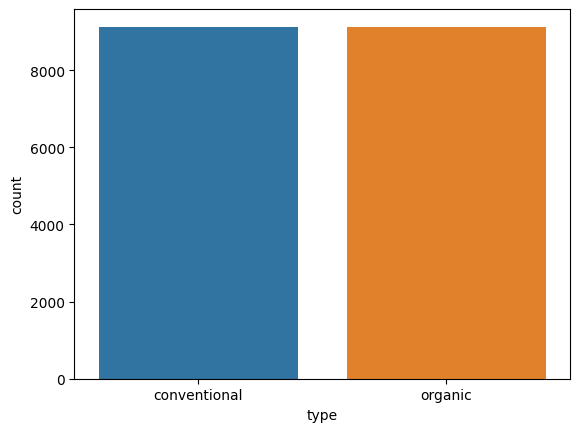

In [17]:
sns.countplot(x='type', data=df)
plt.show()

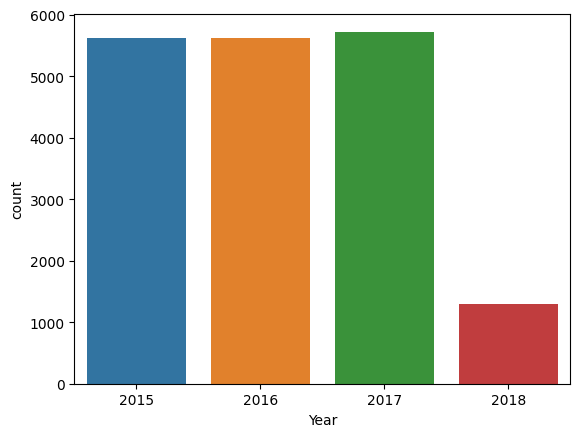

In [18]:
sns.countplot(x='Year', data=df)
plt.show()

- The Datapoints for 2018 is far less in comparison to previous years

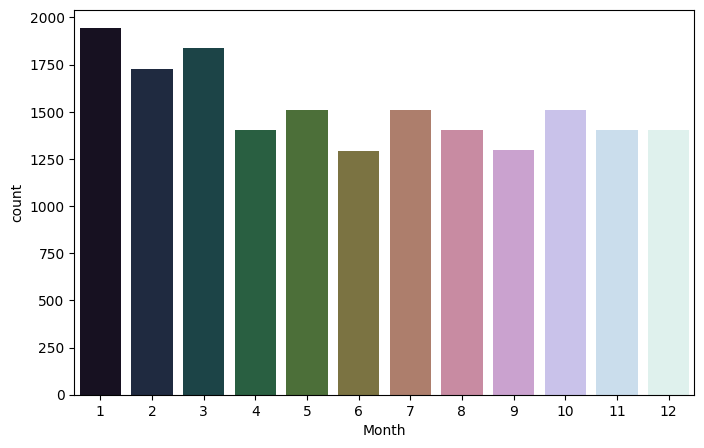

In [19]:
plt.figure(figsize=(8,5))
sns.countplot(x='Month', data=df, palette="cubehelix")
plt.show()

- The Datapoints for January is the highest while lowest for June

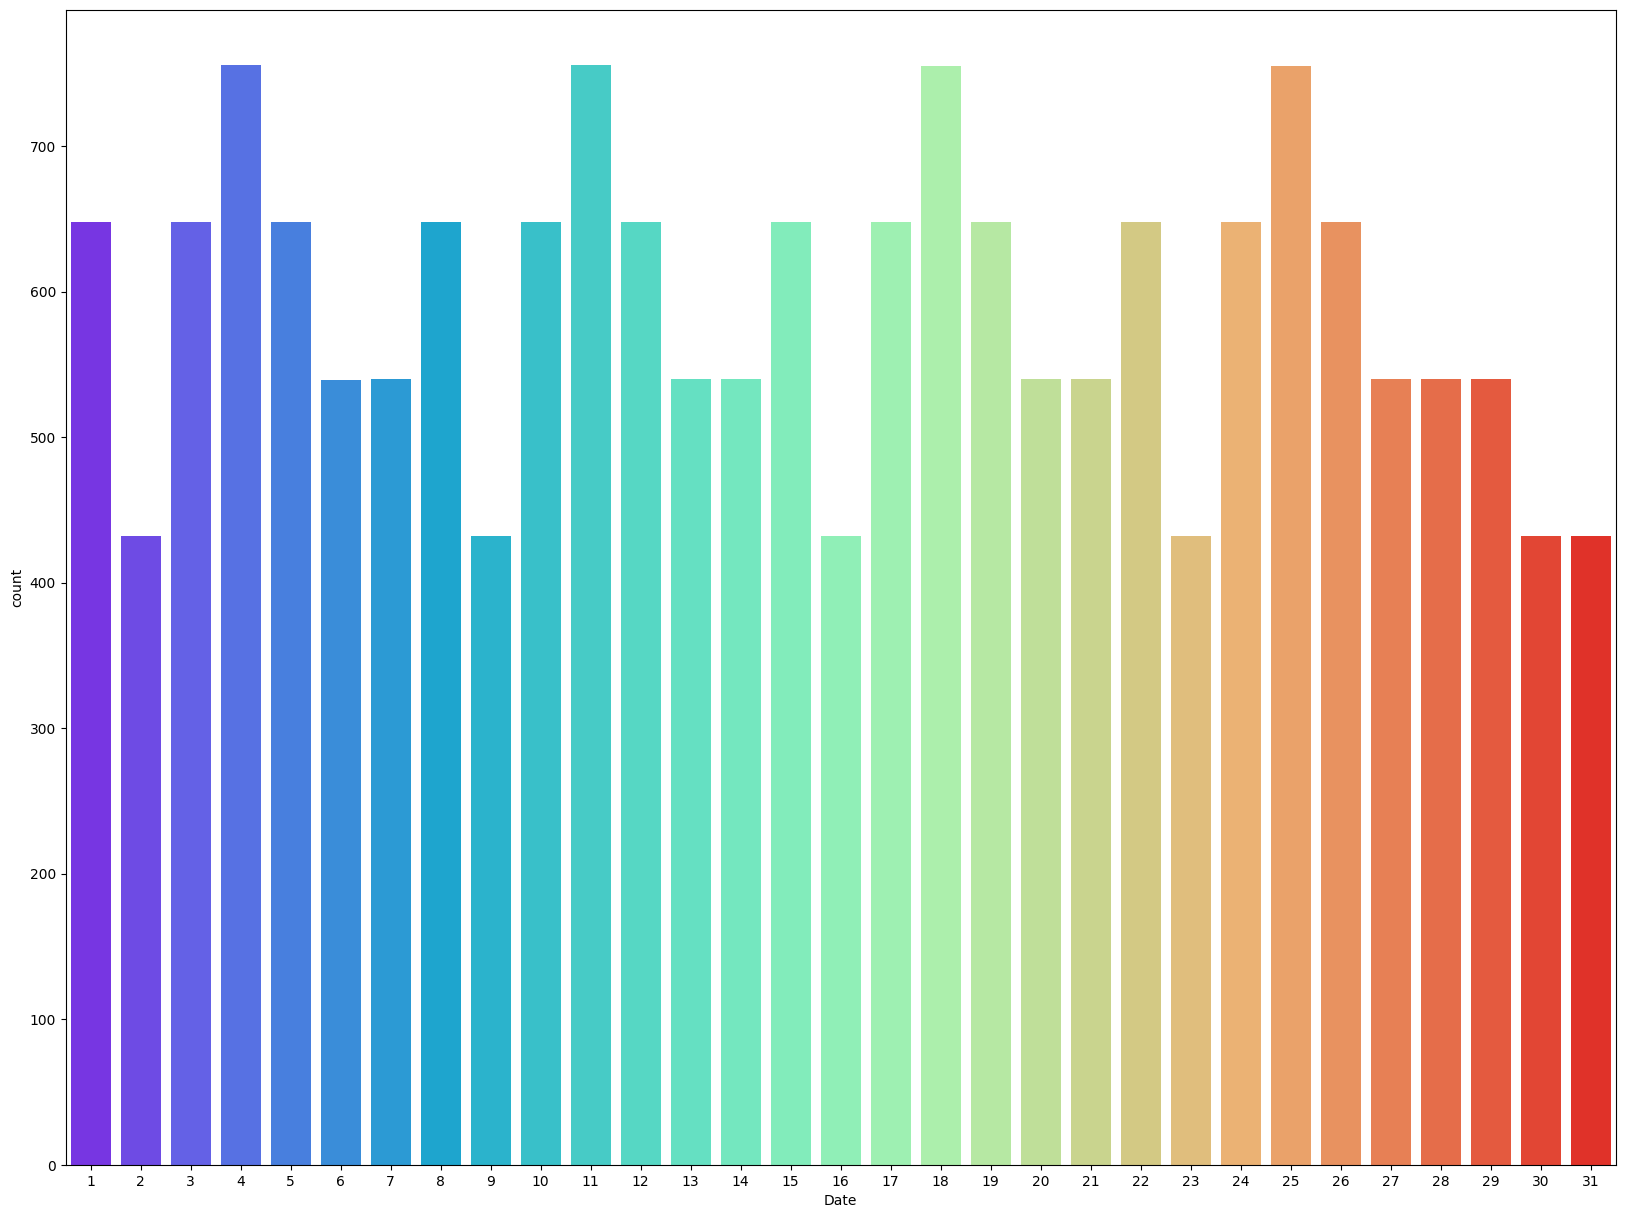

In [20]:
plt.figure(figsize=(20,15))
sns.countplot(x='Date', data=df, palette="rainbow")
plt.show()

- Highest values we have dates 11,4,18,29 while for lowest values we have dates 30, 16, 9, 23, 2 and 31.

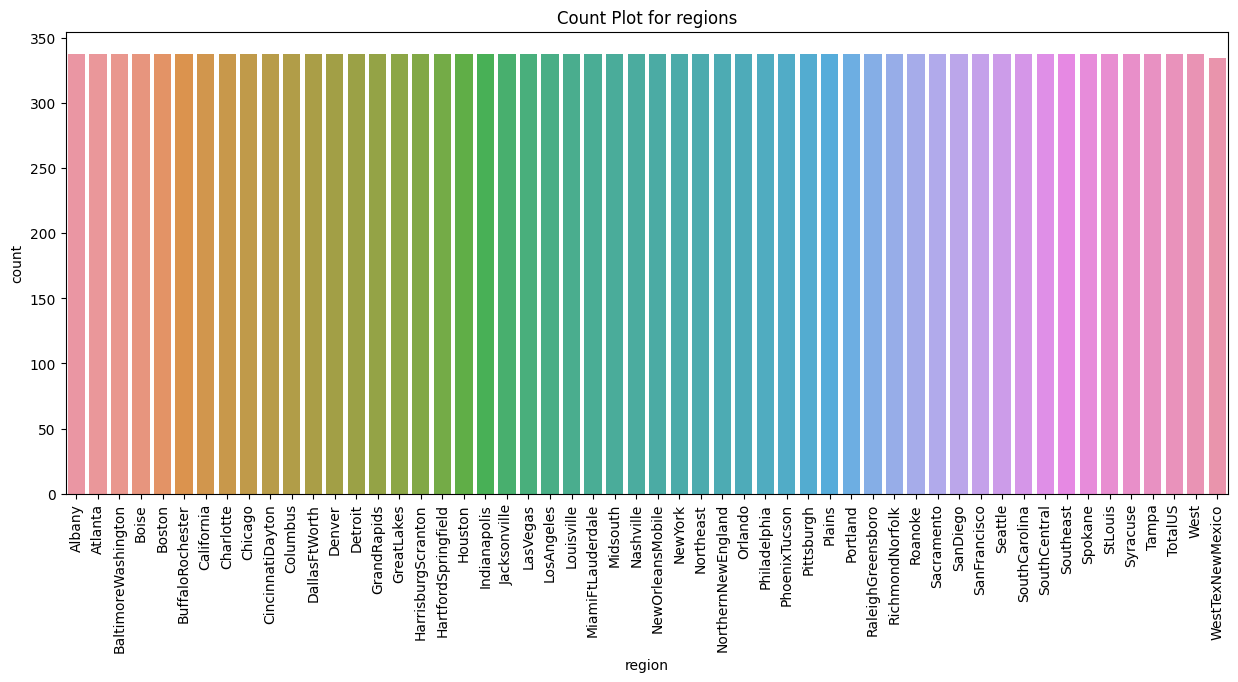

In [21]:
plt.figure(figsize=(15,6))
sns.countplot(df['region'], data=df)
plt.title(f'Count Plot for regions')
plt.xticks(rotation=90)
plt.show()

- The Datapoints for all regions are same except for NewMexico

#### Bivariate Analysis

<Figure size 800x500 with 0 Axes>

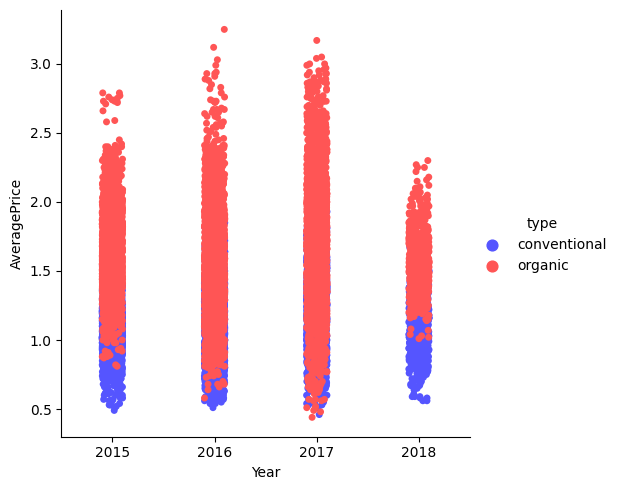

In [22]:
plt.figure(figsize=(8,5))
sns.catplot(x="Year", y="AveragePrice", hue="type", data=df, palette="seismic")
plt.show()

- Organic type Avocado is priced above average comapared to Conventional Type

<Figure size 1500x1000 with 0 Axes>

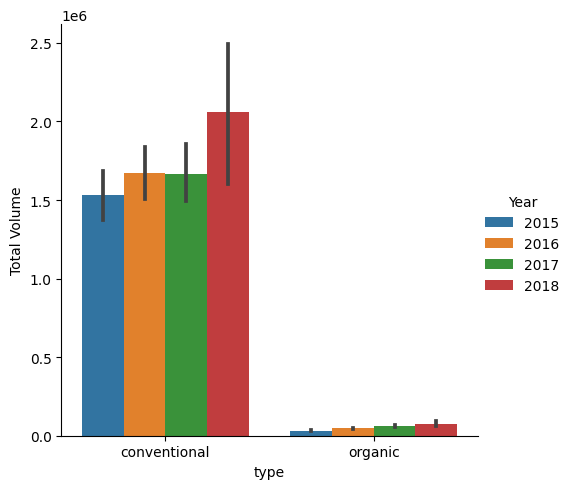

In [23]:
plt.figure(figsize=(15,10))
sns.catplot(x="type", y="Total Volume", hue="Year", kind="bar", data=df)
plt.show()

- The Volume of Organic is very low compared to Conventional type Avocado

<Figure size 1500x1000 with 0 Axes>

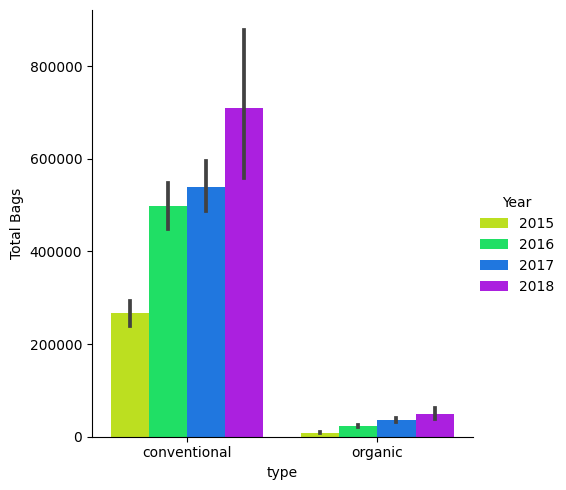

In [24]:
plt.figure(figsize=(15,10))
sns.catplot(x="type", y="Total Bags", hue="Year", data=df, kind="bar", palette="hsv")
plt.show()

- Use of Bags was higher for Conventional Type Avocado becuase of high growth

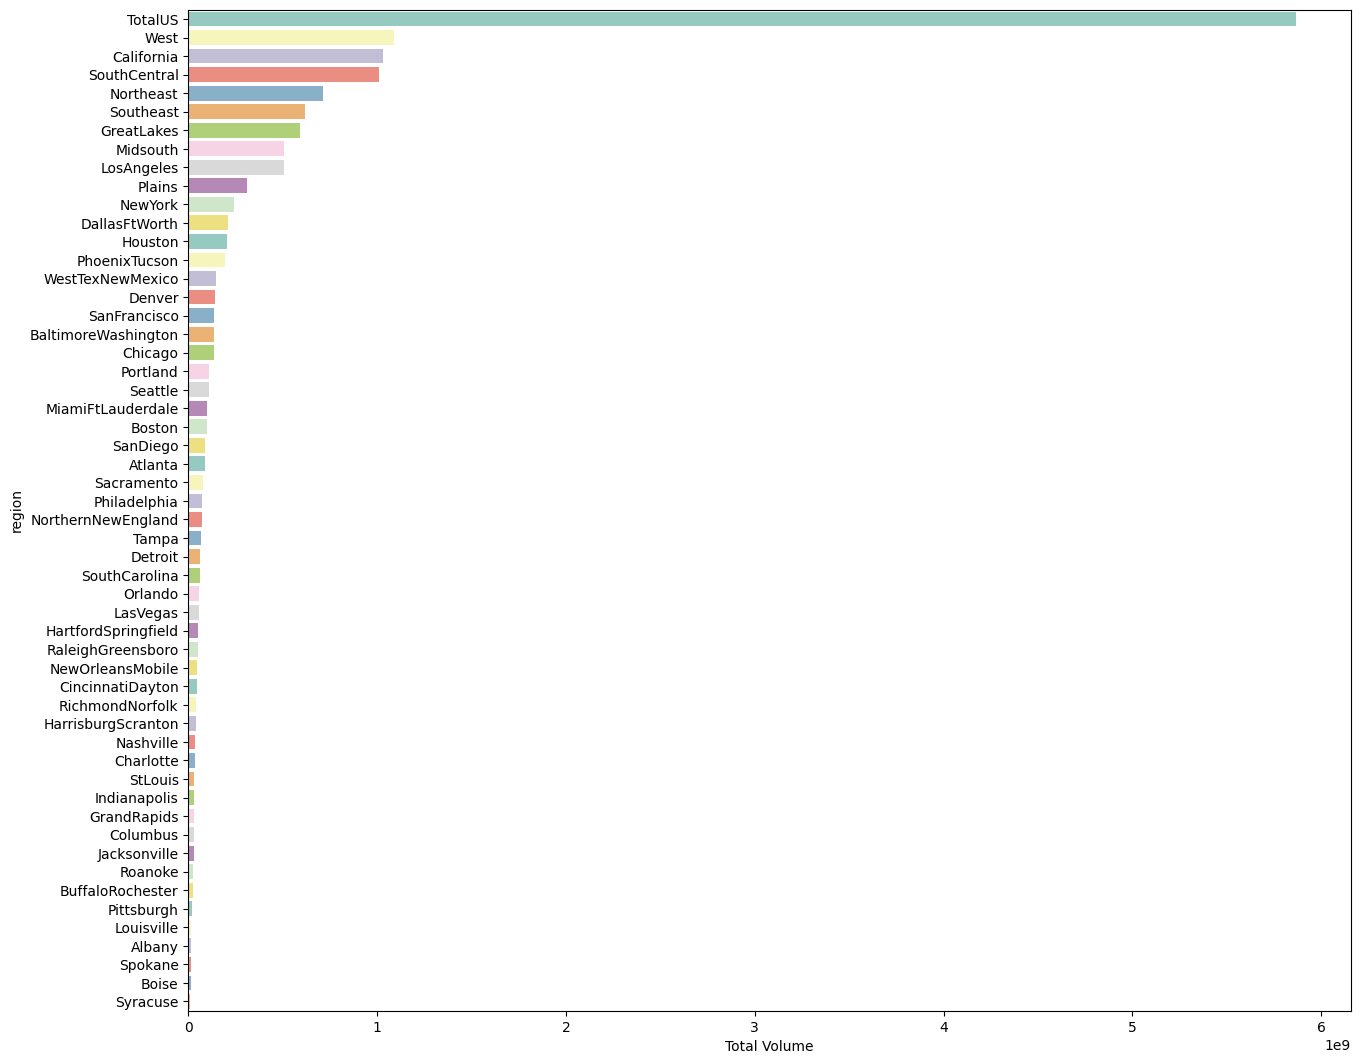

In [25]:
region = df.groupby('region')['Total Volume'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(15,13))
sns.barplot(x=region["Total Volume"], y=region["region"], data=df, palette="Set3")
plt.show()

- Compared to the Total US area per region values are lesser but we can see tha major contributors in region are West, California, South Central, North East, South East, Great Lakes, Mid South, Los Angeles, Plains, New York

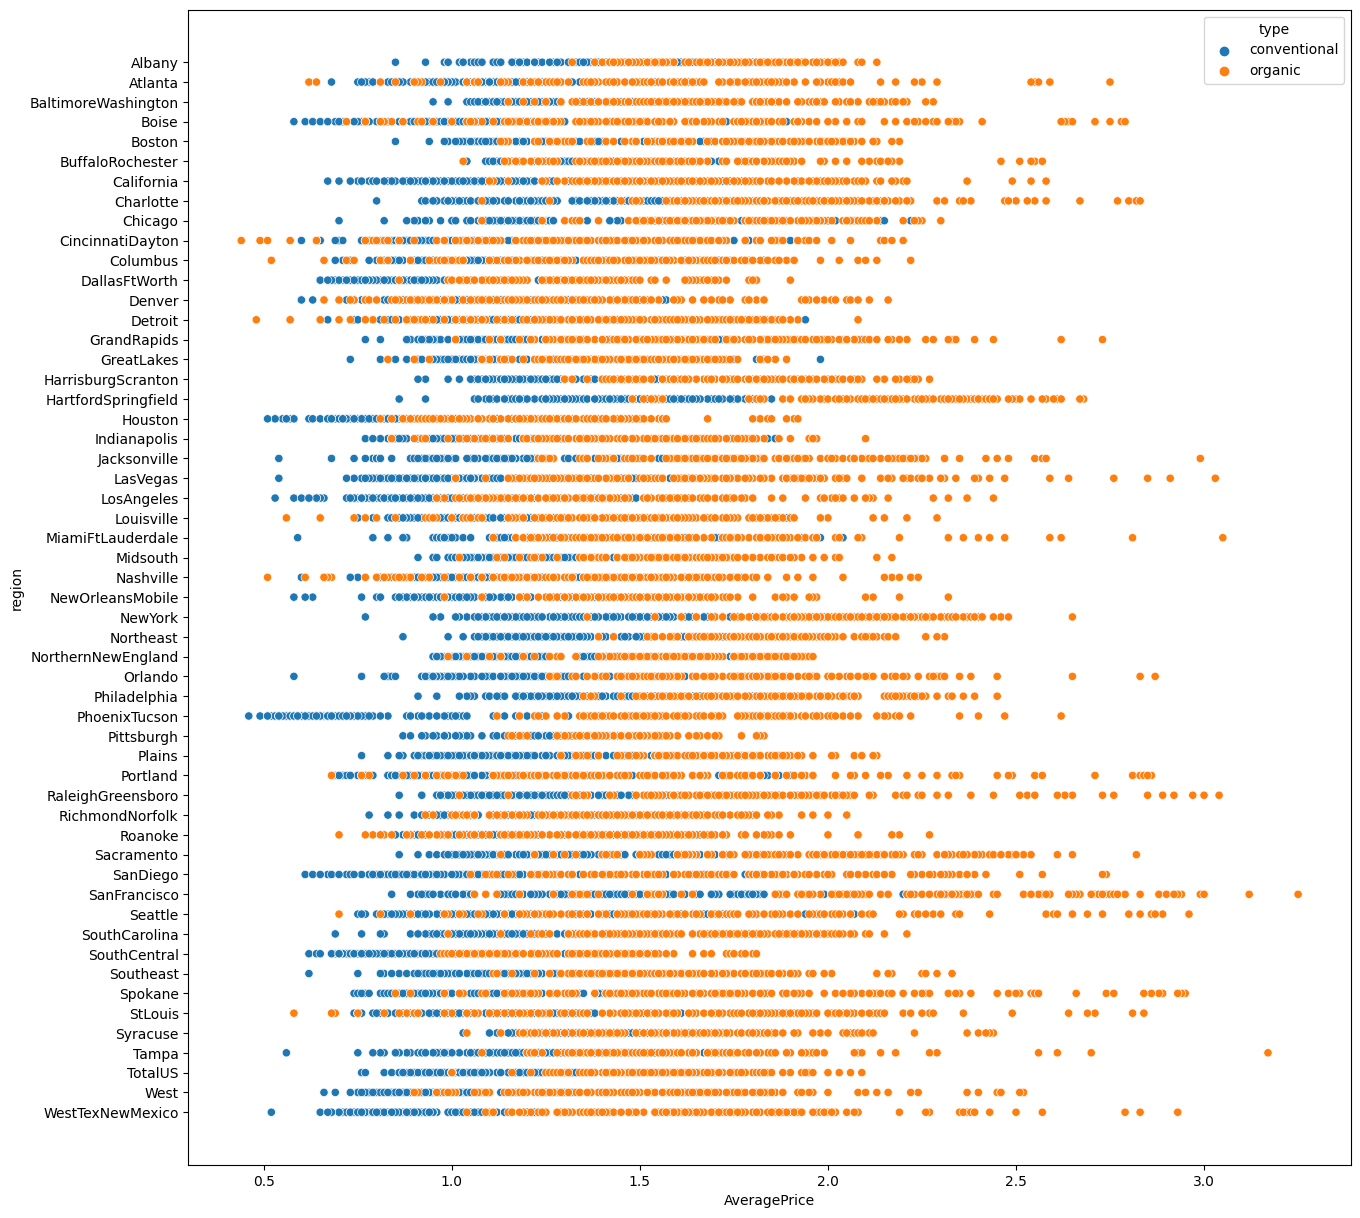

In [26]:
plt.figure(figsize=(15,15))
sns.scatterplot(x='AveragePrice', y='region', hue='type', data=df)
plt.show()

- organic avacados are priced way higher than it's conventional counterparts in each and every region.

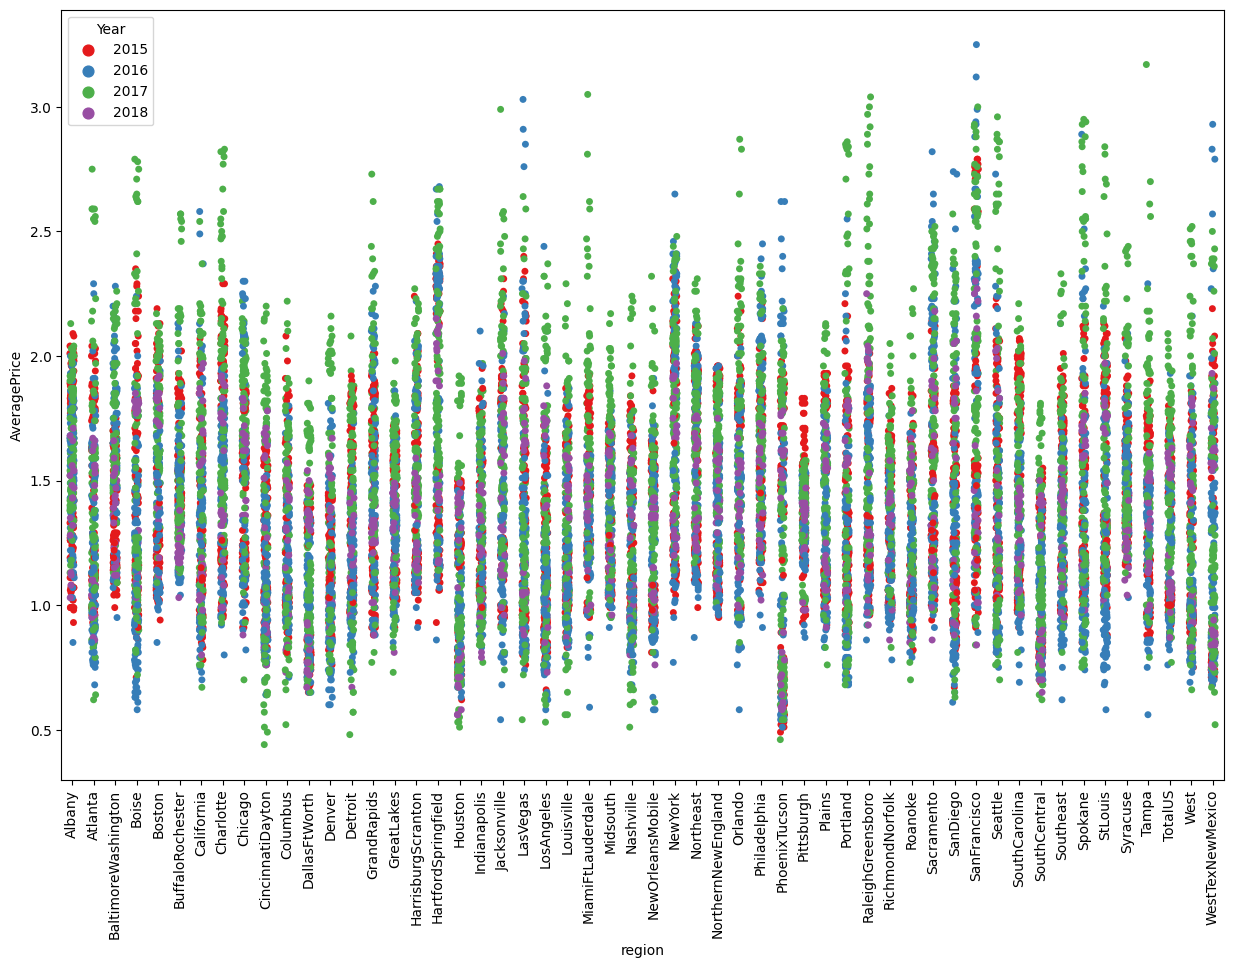

In [27]:
plt.figure(figsize=(15,10))
sns.stripplot(x='region', y='AveragePrice', hue="Year", data=df, palette="Set1")
plt.xticks(rotation=90)
plt.show()

-  Years 2016 and 2017 the average prices were way higher than in the years 2015 and 2018

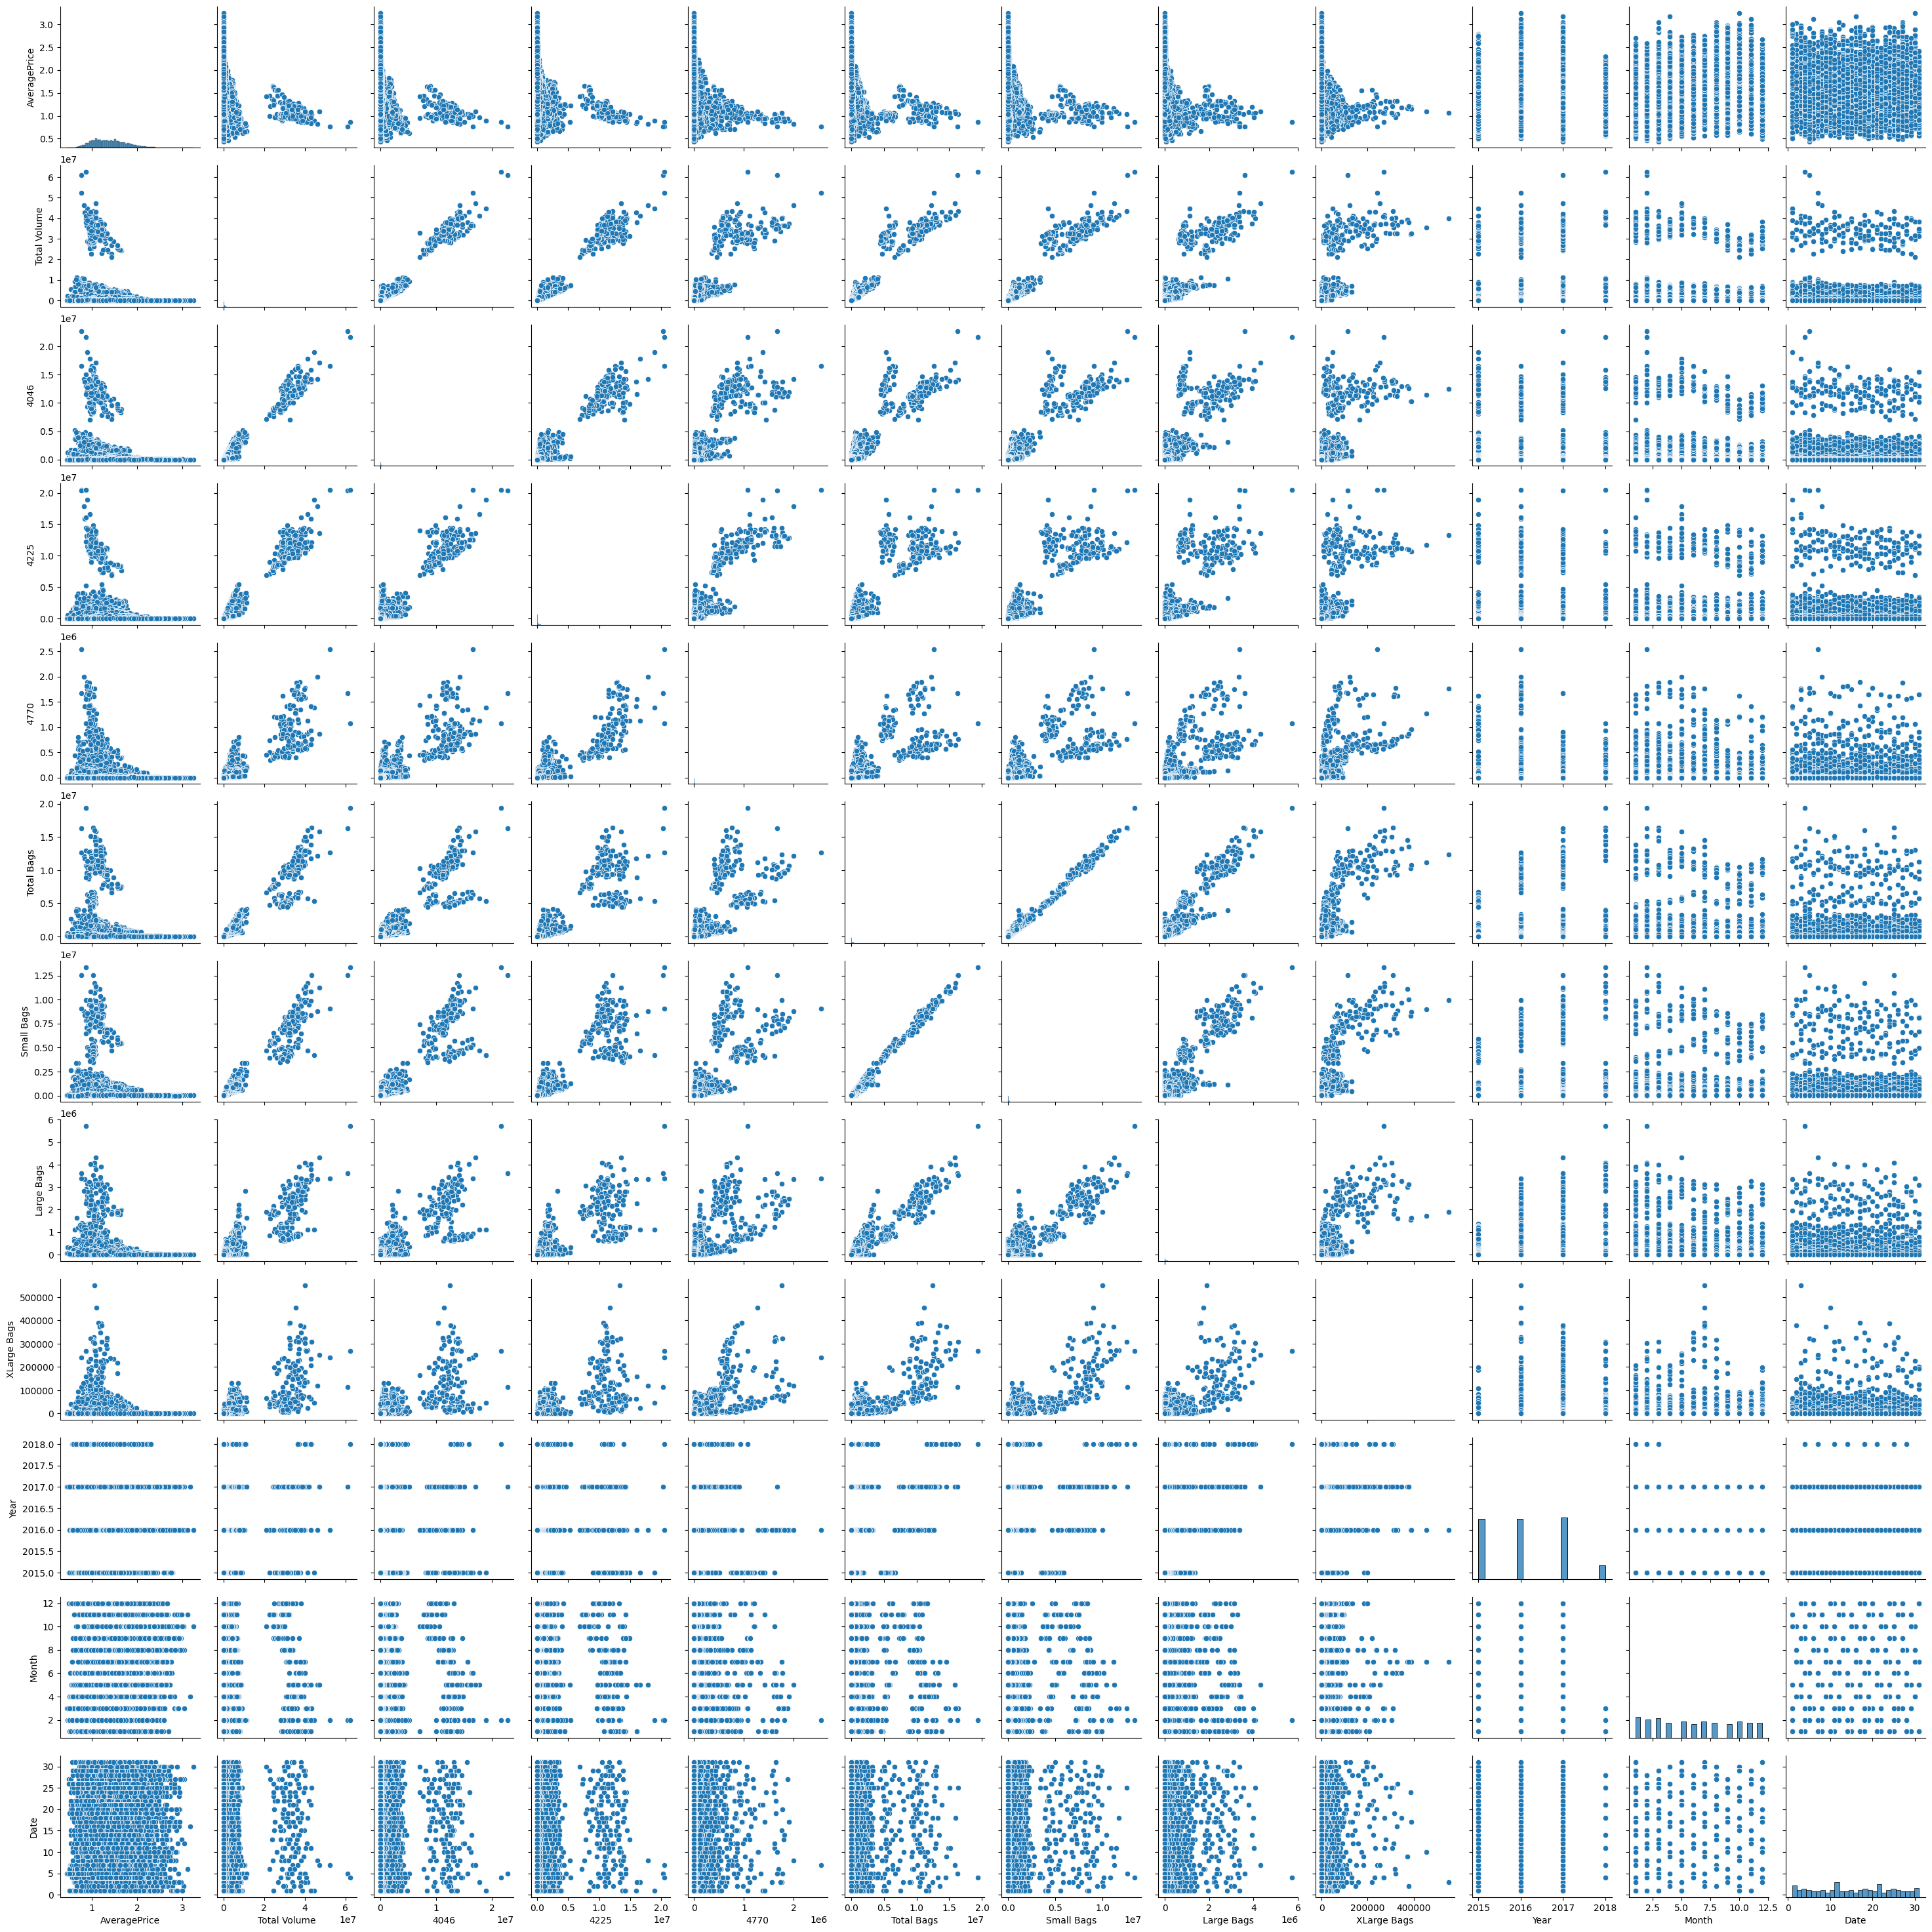

In [28]:
sns.pairplot(df)

#### Correlation

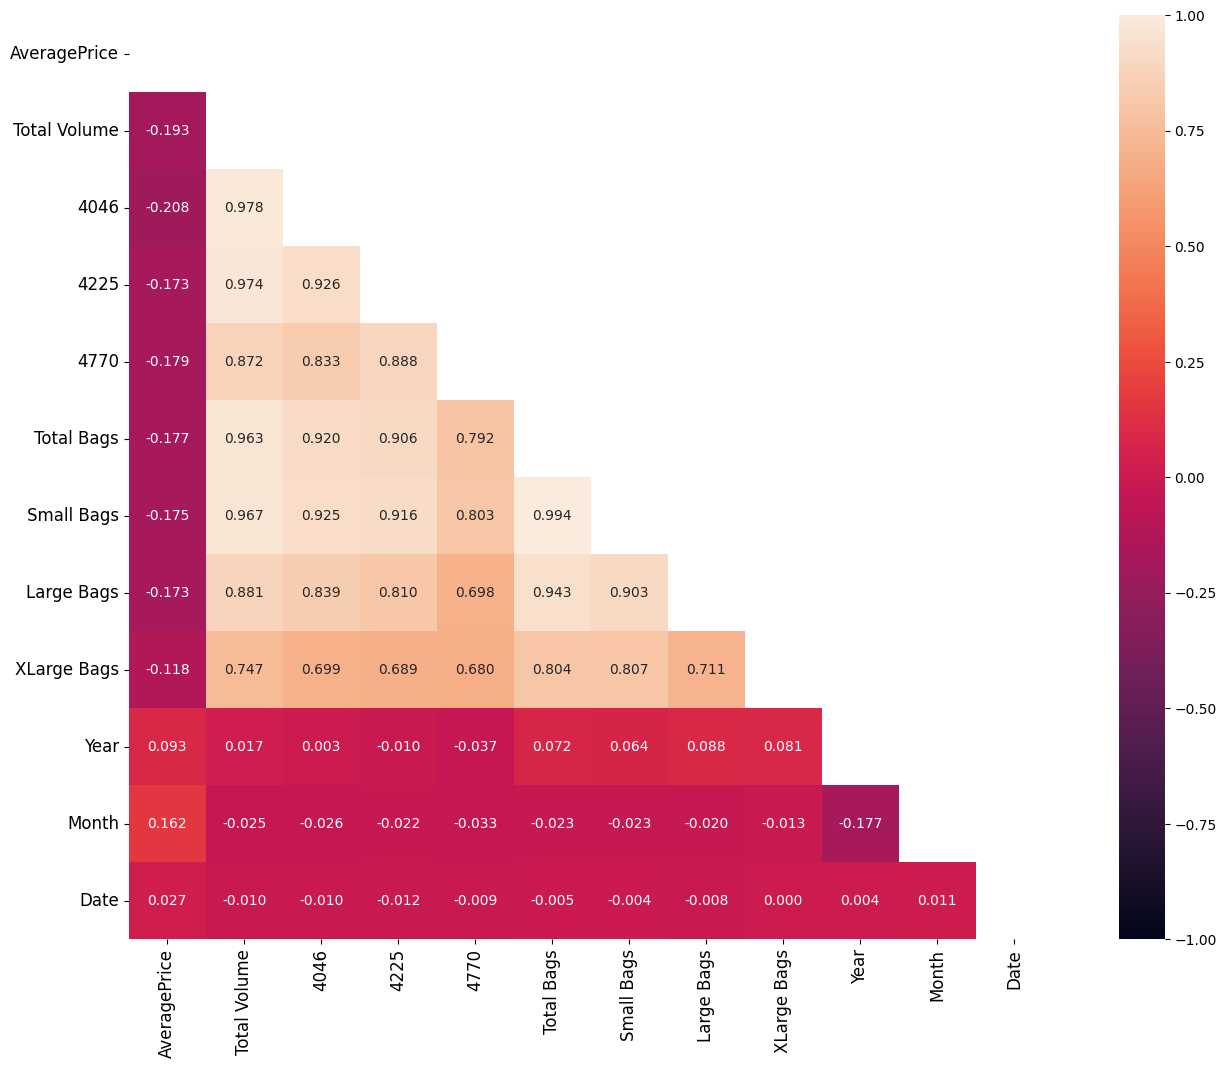

In [29]:
upper_triangle = np.triu(df.corr())
plt.figure(figsize=(17,12))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, mask=upper_triangle)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

- There is Multicollinearity between the features in the model which can create bias.
- The Columns PLU 4046, PLU 4225 and PLU 4770 are all product codes that comprise the Total Volume. Similarly, the columns Small Bags, Large Bags, Extra Large Bags all comprise the Total Bags. Therefore we can drop the unnecessary columns.

In [30]:
## Removing the columns to avoid Multicollinearity

df.drop(["4046", "4225", "4770", "Small Bags", "Large Bags", "XLarge Bags"], axis=1, inplace=True)

In [31]:
df.head()

AveragePrice  Total Volume  Total Bags          type  region  Year  Month  \
0          1.33      64236.62     8696.87  conventional  Albany  2015     12   
1          1.35      54876.98     9505.56  conventional  Albany  2015     12   
2          0.93     118220.22     8145.35  conventional  Albany  2015     12   
3          1.08      78992.15     5811.16  conventional  Albany  2015     12   
4          1.28      51039.60     6183.95  conventional  Albany  2015     11   

   Date  
0    27  
1    20  
2    13  
3     6  
4    29

We will proceed with Encoding the Categorical Features

In [32]:
from sklearn.preprocessing import OrdinalEncoder
 
Encoder = OrdinalEncoder()
df['region']=Encoder.fit_transform(df['region'].values.reshape(-1,1))
df['type']=Encoder.fit_transform(df['type'].values.reshape(-1,1))

In [33]:
df

AveragePrice  Total Volume  Total Bags  type  region  Year  Month  Date
0              1.33      64236.62     8696.87   0.0     0.0  2015     12    27
1              1.35      54876.98     9505.56   0.0     0.0  2015     12    20
2              0.93     118220.22     8145.35   0.0     0.0  2015     12    13
3              1.08      78992.15     5811.16   0.0     0.0  2015     12     6
4              1.28      51039.60     6183.95   0.0     0.0  2015     11    29
...             ...           ...         ...   ...     ...   ...    ...   ...
18244          1.63      17074.83    13498.67   1.0    53.0  2018      2     4
18245          1.71      13888.04     9264.84   1.0    53.0  2018      1    28
18246          1.87      13766.76     9394.11   1.0    53.0  2018      1    21
18247          1.93      16205.22    10969.54   1.0    53.0  2018      1    14
18248          1.62      17489.58    12014.15   1.0    53.0  2018      1     7

[18249 rows x 8 columns]

### Outliers

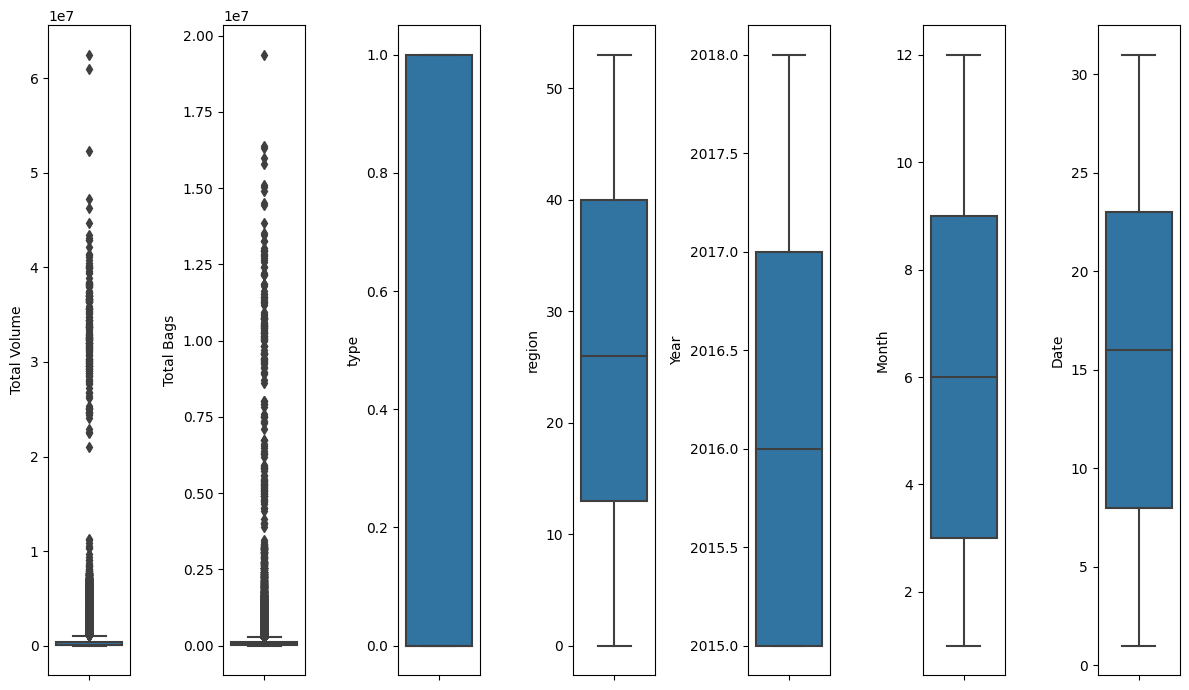

In [34]:
fig, ax = plt.subplots(ncols=7, nrows=1, figsize=(12,7))
index = 0
features = df.drop("AveragePrice", axis=1)
ax = ax.flatten()
for col, value in features.items():
    sns.boxplot(y=col, data=df, ax=ax[index])
    index += 1
plt.tight_layout()
plt.show()

- The features "Total Volume" , 'Total Bags' seem to have presence of Outliers

In [35]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy()

Shape of the dataframe before removing outliers:  (18249, 8)
Shape of the dataframe after removing outliers:  (17931, 8)
Percentage of data loss post outlier removal:  1.7425612362321221


- The percentage of Data Loss is only 1.7% so we can proceed Smoothly

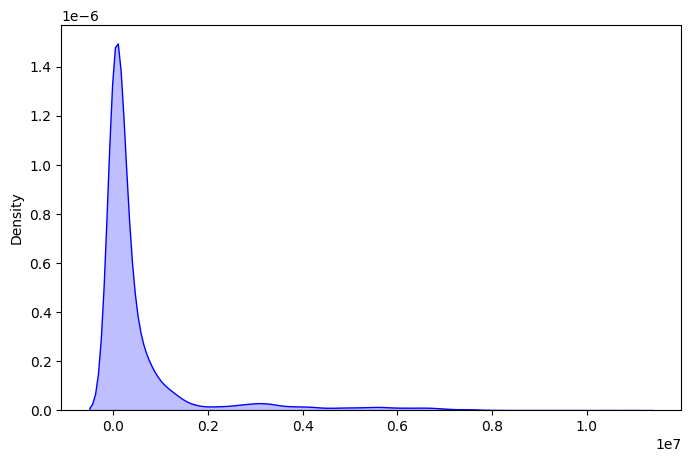

In [36]:
plt.figure(figsize=(8,5))
sns.distplot(x=df["Total Volume"], hist=False, color="b", kde_kws={"shade": True})
plt.show()

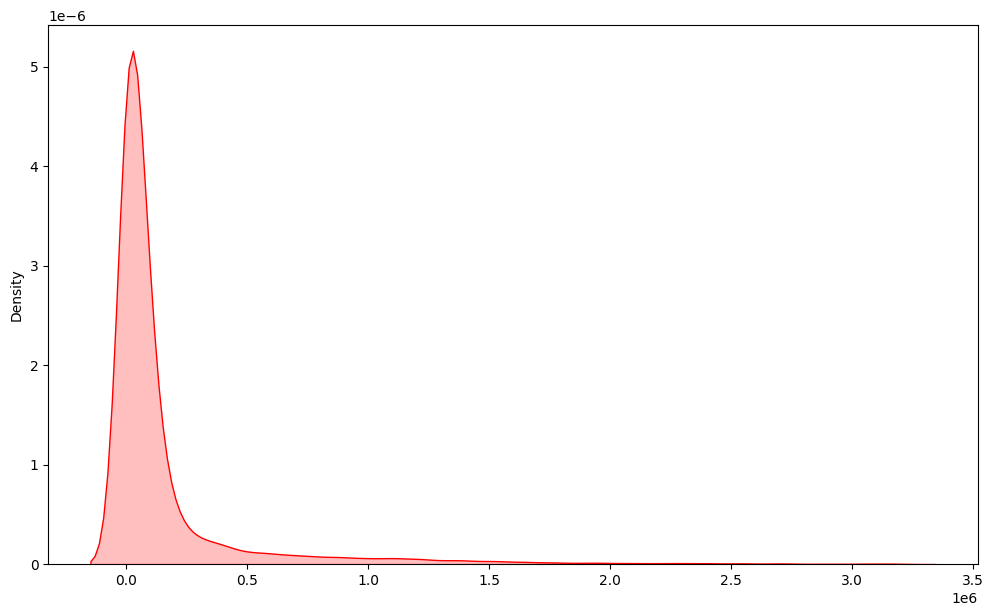

In [37]:
plt.figure(figsize=(12,7))
sns.distplot(x=df["Total Bags"], hist=False, color="r", kde_kws={"shade": True})
plt.show()

- Right skewness Present in the above columns

We Can use Log Transform to Fix the skewness

In [38]:
for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [39]:
df.skew()

AveragePrice    0.388855
Total Volume   -0.024234
Total Bags     -0.334742
type           -0.005912
region          0.014808
Year            0.225227
Month           0.114771
Date            0.014381
dtype: float64

- The skewness of the columns have been reduced to acceptable range

### Splitting the Dataset

In [40]:
X = df.drop('AveragePrice', axis=1)
y = df['AveragePrice']

### Feature Scaling

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [42]:
X

Total Volume  Total Bags      type    region      Year     Month  \
0         -0.090582   -0.493196 -1.002960 -1.694204 -1.215795  1.650340   
1         -0.161393   -0.452528 -1.002960 -1.694204 -1.215795  1.650340   
2          0.183695   -0.523161 -1.002960 -1.694204 -1.215795  1.650340   
3          0.002395   -0.677598 -1.002960 -1.694204 -1.215795  1.650340   
4         -0.193989   -0.649161 -1.002960 -1.694204 -1.215795  1.367566   
...             ...         ...       ...       ...       ...       ...   
17926     -0.686346   -0.292115  0.997049  1.734617  1.973888 -1.177395   
17927     -0.779229   -0.464260  0.997049  1.734617  1.973888 -1.460168   
17928     -0.783172   -0.457923  0.997049  1.734617  1.973888 -1.460168   
17929     -0.709849   -0.387010  0.997049  1.734617  1.973888 -1.460168   
17930     -0.675555   -0.345404  0.997049  1.734617  1.973888 -1.460168   

           Date  
0      1.291781  
1      0.493909  
2     -0.303964  
3     -1.101837  
4      1.519745  
...         ...  
17926 -1.329801  
17927  1.405763  
17928  0.607890  
17929 -0.189982  
17930 -0.987855  

[17931 rows x 7 columns]

#### Importing ML Model Algorithms

In [43]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor

#### Importing Metrics for performance Evaluation

In [44]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

#### Train test split and Finding the Best Random State

In [45]:
from sklearn.model_selection import train_test_split
maxAccu=0
maxRS=0

for i in range(1, 1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=i)
    lr=LinearRegression()
    lr.fit(X_train, y_train)
    pred = lr.predict(X_test)
    r2 = r2_score(y_test, pred)
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best r2 score is", maxAccu,"on Random State", maxRS)

Best r2 score is 0.5055599836039789 on Random State 752


#### Train test split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=752)

#### Model Selection

- We will test our data with many ML algorithms and conclude which algorithm performs the best

- We will make a function to train test split in dependent and indepedent features and then train the model while predicting the 'Average Price'
- The function will caluclate the RMSE score , r2_score , calculates the Cross-Validation score and in the end it will Calculate the Difference between the r2_score and Cross-Validation score.

In [53]:
## Creating a function to make training easier

def Average_price(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=752)
    
    # Model Training
    model.fit(X_train, y_train)
    
    # Predicting Value using X_test
    y_pred = model.predict(X_test)
    
    # Calucalting the RMSE Score (The Lower the score the Better)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    print("RMSE Score is:", rmse)
    
    # Calcualting the R2_score
    r2 = r2_score(y_test, y_pred, multioutput='variance_weighted')*100
    print("R2 Score is:", r2)
    
    # Calculating the Cross Validation Score (The value of cv will be 5)
    Cross_Val_score = (cross_val_score(model, X, y, cv=5).mean())*100
    print("Cross Validation Score:", Cross_Val_score)
    
    # Difference between the r2 score and Cross_vaL_score
    result = r2 - Cross_Val_score
    print("R2 Score - Cross Validation Score is", result)

#### Linear Regression

In [54]:
model=LinearRegression()
Average_price(model, X, y)

RMSE Score is: 0.27750430296887946
R2 Score is: 50.55599836039789
Cross Validation Score: 12.29936920667738
R2 Score - Cross Validation Score is 38.25662915372051


#### Ridge Regression 

In [55]:
model=Ridge()
Average_price(model, X, y)

RMSE Score is: 0.2775066076845901
R2 Score is: 50.555177076984535
Cross Validation Score: 12.303005562855555
R2 Score - Cross Validation Score is 38.25217151412898


#### Lasso Regression

In [56]:
model=Lasso()
Average_price(model, X, y)

RMSE Score is: 0.3946516007464973
R2 Score is: -0.0004389213029920569
Cross Validation Score: -116.71934809126752
R2 Score - Cross Validation Score is 116.71890916996453


#### Decsion Tree Regressor¶

In [57]:
model=DecisionTreeRegressor()
Average_price(model, X, y)

RMSE Score is: 0.19255859466155173
R2 Score is: 76.19325696870288
Cross Validation Score: -23.863452343525317
R2 Score - Cross Validation Score is 100.05670931222821


#### Random Forest Regressor¶

In [58]:
model=RandomForestRegressor()
Average_price(model, X, y)

RMSE Score is: 0.13022486817872442
R2 Score is: 89.11165127287455
Cross Validation Score: 10.704198450178566
R2 Score - Cross Validation Score is 78.40745282269599


#### K Neighbours Regressor

In [59]:
model = KNeighborsRegressor()
Average_price(model, X, y)

RMSE Score is: 0.23045224564840683
R2 Score is: 65.90143851701639
Cross Validation Score: -6.785757445114868
R2 Score - Cross Validation Score is 72.68719596213126


#### Extra-Tree Regressor

In [60]:
model = ExtraTreesRegressor()
Average_price(model, X, y)

RMSE Score is: 0.13461973009648973
R2 Score is: 88.36432453123899
Cross Validation Score: 12.319116850570692
R2 Score - Cross Validation Score is 76.0452076806683


#### XGBoost Regressor

In [61]:
from xgboost import XGBRegressor

In [62]:
model = XGBRegressor()
Average_price(model,X,y)

RMSE Score is: 0.12227662124770518
R2 Score is: 90.40022556928253
Cross Validation Score: 39.48804192771808
R2 Score - Cross Validation Score is 50.91218364156445


### Hyper parameter tuning on the best ML Model

In [63]:
# Choosing XGB Regressor

parameters = {'n_estimators' : [200, 400, 600],
              'gamma' : [2.0, 3.0, 4.0],
              'max_depth' : [4, 6, 8],
              'n_jobs' : [-2, -1, 1]
             }

- We will use GridSearchCV to Tune our Model

In [64]:
Grid_Search = GridSearchCV(XGBRegressor(), parameters, cv=5)
Grid_Search.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'gamma': [2.0, 3.0, 4.0], 'max_depth': [4, 6, 8],
                         'n_estimators': [200, 400, 600],
                         'n_jobs': [-2, -1, 1]})

In [65]:
## To identify the best paramters according to GridSearchCV
Grid_Search.best_params_

{'gamma': 2.0, 'max_depth': 8, 'n_estimators': 200, 'n_jobs': -2}

### Final Model using the Best Parameters

In [67]:
Final_Model = XGBRegressor(gamma=2.0, max_depth=8, n_estimators=200, n_jobs=-2)
Classifier = Final_Model.fit(X_train, y_train)
y_pred = Final_Model.predict(X_test)
Final_r2score = r2_score(y_test, y_pred)*100
print("R2 score for Final Model :", Final_r2score)

R2 score for Final Model : 78.31821104628585


#### Saving the best model

In [68]:
import joblib
filename = "Avocado_price_Prediction.pkl"
joblib.dump(Final_Model, filename)

['Avocado_price_Prediction.pkl']